<a href="https://colab.research.google.com/github/islak/phishing-detection/blob/main/phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
import os
import pandas as pd

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d sergioagudelo/phishing-url-detection
!ls

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/sergioagudelo/phishing-url-detection
License(s): MIT
 99% 373M/376M [00:04<00:00, 96.4MB/s]
100% 376M/376M [00:05<00:00, 71.1MB/s]
phishing-url-detection.zip  sample_data


In [3]:
!unzip phishing-url-detection.zip

Archive:  phishing-url-detection.zip
  inflating: out.csv                 


# Loading Data

In [4]:
import pandas as pd

df = pd.read_csv('out.csv')
print(df.head())

                                             url          source       label  \
0  apaceast.cloudguest.central.arubanetworks.com  Cisco-Umbrella  legitimate   
1                              quintadonoval.com        Majestic  legitimate   
2                               nomadfactory.com        Majestic  legitimate   
3                               tvarenasport.com        Majestic  legitimate   
4                    widget.cluster.groovehq.com  Cisco-Umbrella  legitimate   

   url_length  starts_with_ip  url_entropy  has_punycode  digit_letter_ratio  \
0          45           False     3.924535         False                 0.0   
1          17           False     3.572469         False                 0.0   
2          16           False     3.327820         False                 0.0   
3          16           False     3.500000         False                 0.0   
4          27           False     3.930270         False                 0.0   

   dot_count  at_count  dash_count  tl

#Exploring dataset

In [5]:
df.shape

(2500000, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   url                 object 
 1   source              object 
 2   label               object 
 3   url_length          int64  
 4   starts_with_ip      bool   
 5   url_entropy         float64
 6   has_punycode        bool   
 7   digit_letter_ratio  float64
 8   dot_count           int64  
 9   at_count            int64  
 10  dash_count          int64  
 11  tld_count           int64  
 12  domain_has_digits   bool   
 13  subdomain_count     int64  
 14  nan_char_entropy    float64
 15  has_internal_links  bool   
 16  whois_data          object 
 17  domain_age_days     float64
dtypes: bool(4), float64(4), int64(6), object(4)
memory usage: 276.6+ MB


In [7]:
df.describe()

,url_length,url_entropy,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,subdomain_count,nan_char_entropy,domain_age_days
count,2.500000e+06,2.500000e+06,2.499999e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,1.749311e+06
mean,4.588017e+01,3.907981e+00,1.168567e-01,2.174582e+00,1.141840e-02,7.410540e-01,3.923280e-02,7.777008e-01,4.651602e-01,4.863090e+03
std,7.439959e+01,6.357209e-01,2.451448e-01,1.736380e+00,1.407410e-01,1.662709e+00,3.905095e-01,1.103257e+00,1.880023e-01,3.345879e+03
min,4.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.600000e+01
25%,1.700000e+01,3.452820e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.063967e-01,2.009000e+03
50%,2.900000e+01,3.911860e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.154523e-01,4.281000e+03
75%,5.200000e+01,4.329283e+00,1.333333e-01,3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,6.184690e-01,7.740000e+03
max,2.552300e+04,6.048781e+00,2.084000e+01,2.110000e+02,3.200000e+01,3.220000e+02,6.500000e+01,4.300000e+01,1.901504e+00,4.554100e+04


In [8]:
#missing values
df.isnull().sum()

,0
url,1
source,0
label,0
url_length,0
starts_with_ip,0
url_entropy,0
has_punycode,0
digit_letter_ratio,1
dot_count,0
at_count,0


In [9]:
# missing vals in %
df.isnull().sum()/len(df) * 100

,0
url,0.00004
source,0.00000
label,0.00000
url_length,0.00000
starts_with_ip,0.00000
url_entropy,0.00000
has_punycode,0.00000
digit_letter_ratio,0.00004
dot_count,0.00000
at_count,0.00000


In [10]:
# fill missing whois with 'unknown' missing whois data is sus
df['whois_data'].fillna('Unknown',inplace=True)

In [11]:
# fill domain_age_days with mean bc it is numerical data
median_age = df['domain_age_days'].median()
df['domain_age_days'].fillna(median_age,inplace=True)

In [12]:
# fill url w/ 'unknown'
df['url'].fillna('Unknown URL',inplace=True)

In [13]:
# fll digit_letter_ratio with mean
mean_digit_letter_ratio = df['digit_letter_ratio'].mean()
df['digit_letter_ratio'].fillna(mean_digit_letter_ratio, inplace=True)

In [14]:
# verify no more missing vals:
df.isnull().sum()/len(df) * 100

,0
url,0.0
source,0.0
label,0.0
url_length,0.0
starts_with_ip,0.0
url_entropy,0.0
has_punycode,0.0
digit_letter_ratio,0.0
dot_count,0.0
at_count,0.0


correlation analysis not helpful here because there are alot of non numerical features that aren't accounted for. Features are also unnormalized (not on same scale) and have high cardinality (features like url with lots of unique vals).

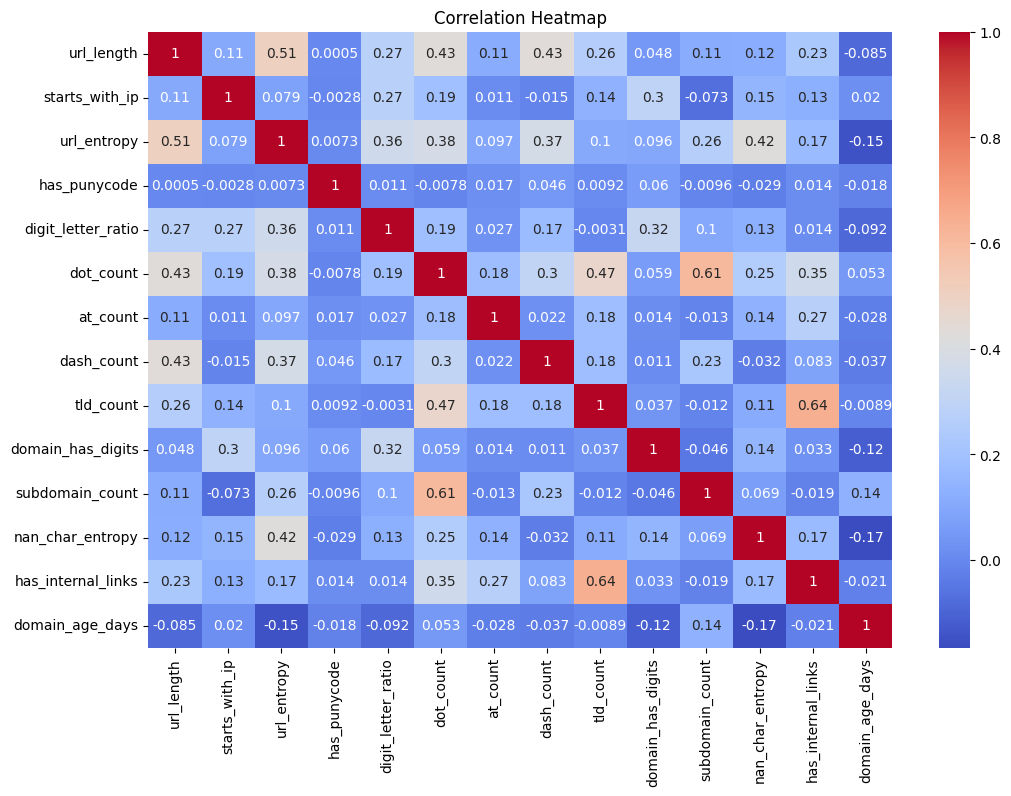

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['int64', 'float64', 'bool'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()